# pre-processing

In [1]:
#enable autocomplete
%config IPCompleter.greedy=True 

#load packages
import sys #access to system parameters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#load data
file_path = r"titanic_train.csv"
data = pd.read_csv(file_path)
#complete missing age with median
data['Age'].fillna(data['Age'].median(), inplace = True)

#complete missing fare with median
data['Fare'].fillna(data['Fare'].median(), inplace = True)

#complete embarked with mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

#complete Cabin with mode
data['Cabin'].fillna(data['Cabin'].mode()[0], inplace = True)

data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

data['IsAlone'] = 1 #initialize to yes/1 is alone
data['IsAlone'].loc[data['FamilySize'] > 1] = 0

def my_regex(x):
    try:
        num = re.search(r'[0-9]+',x)
        return num.group(0)
    except:
        return 0
    return 

data['Cabin Num'] = data.Cabin.apply(lambda x : my_regex(x))    
#data.head()  

x = data[['Cabin Num','IsAlone','FamilySize','Parch','SibSp','Age']]

y = data.Survived

C:\Users\zigi\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


# Split Training and Testing Data

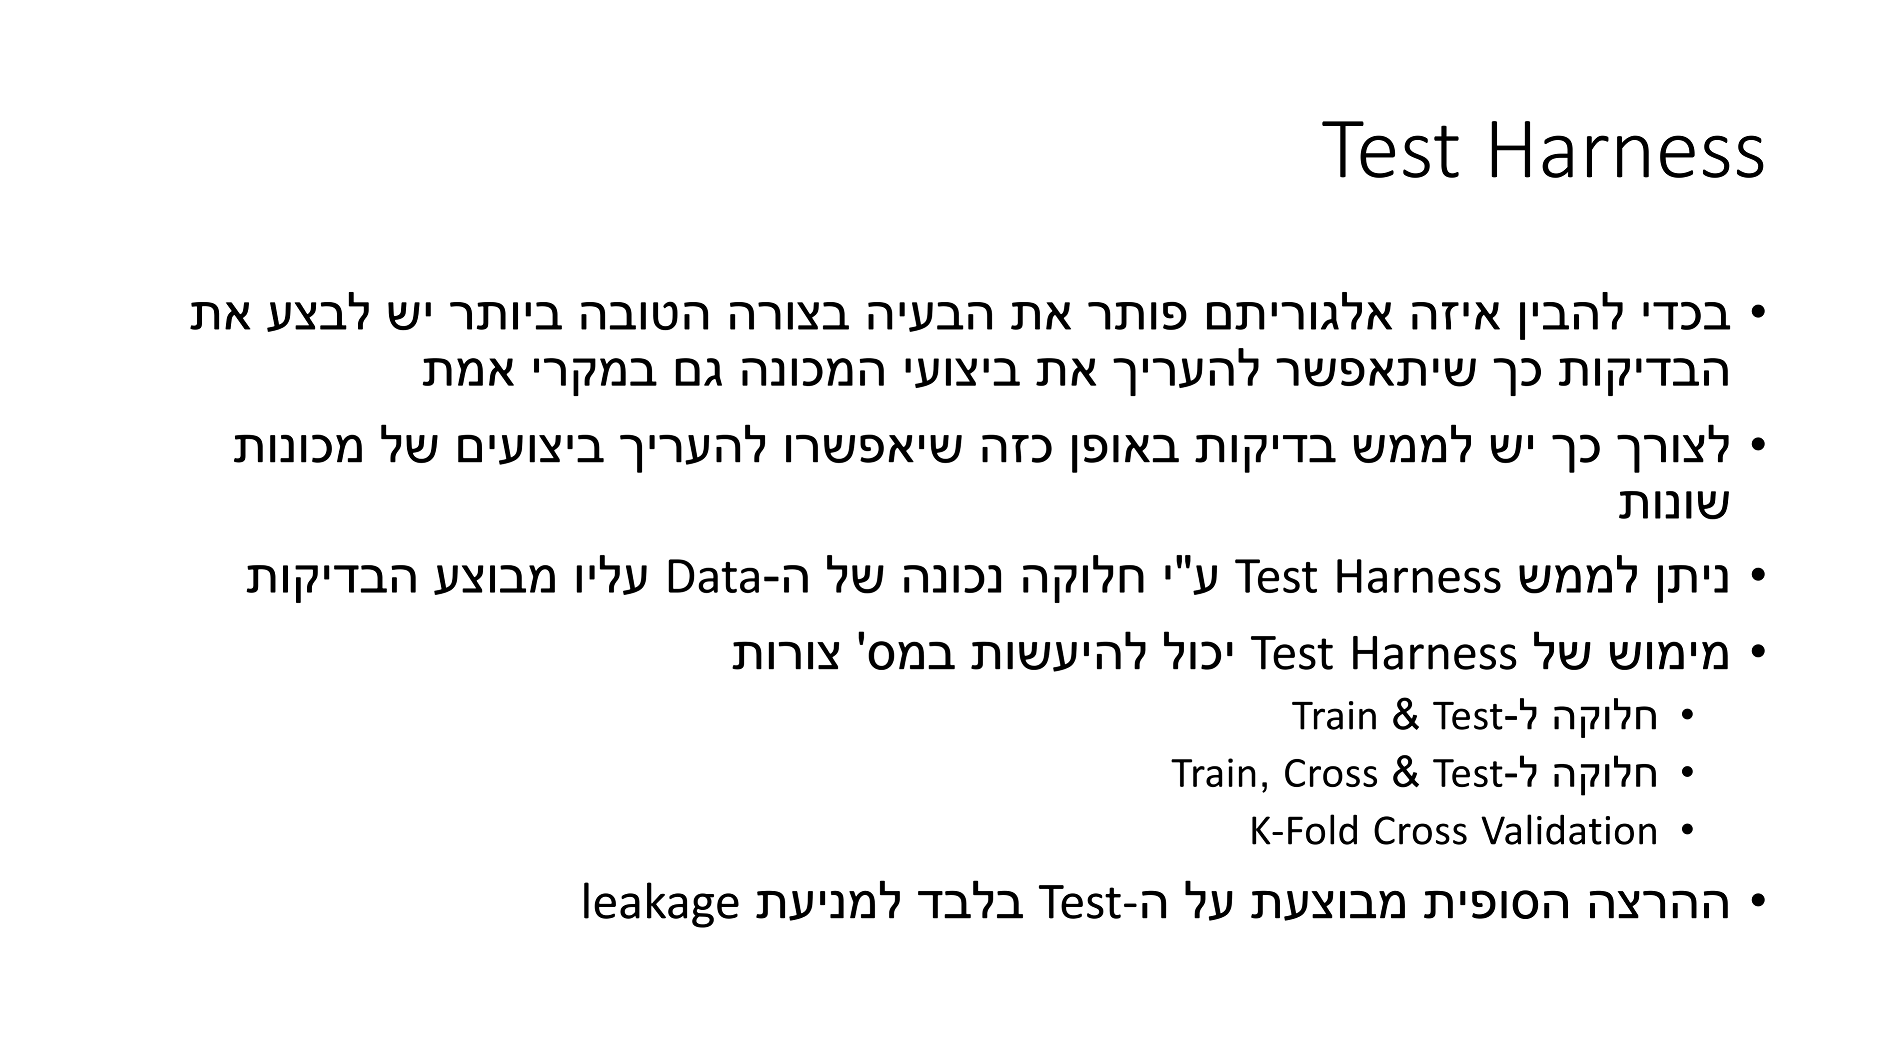

In [2]:
from IPython.display import Image
Image(filename='‏‏Test Harness.PNG')

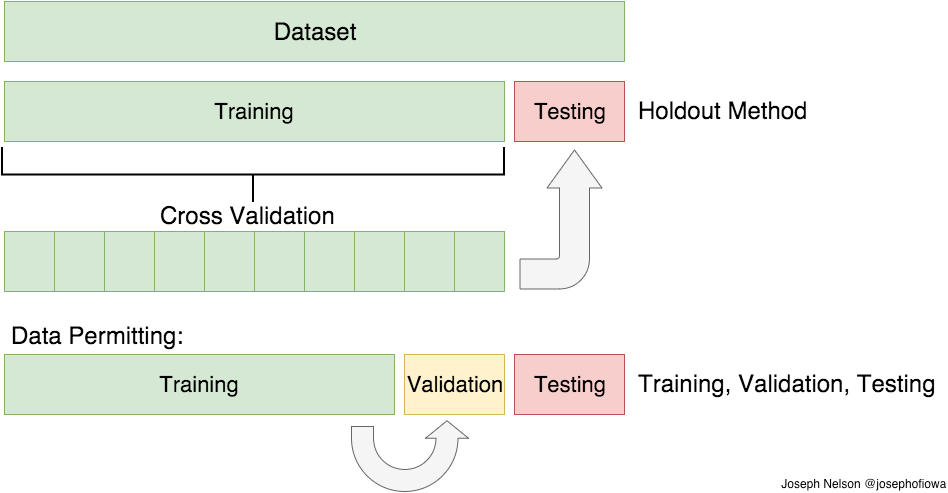

In [3]:
Image(filename='train_test_split.png')

# train test split

In [4]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
import numpy as np
from sklearn.model_selection import train_test_split
#x, y = np.arange(10).reshape((5, 2)), range(5)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

print("All Features" + "\n")
print(x)
print("\n")

print("All Target" + "\n")
print(list(y))
print("\n")

print("train Features" + "\n")
print(x_train)
print("\n")

print("train Target" + "\n")
print(y_train)
print("\n")

print("test Features" + "\n")
print(x_test)
print("\n")

print("test Target" + "\n")
print(y_test)
print("\n")

All Features

     Cabin Num  IsAlone  FamilySize  Parch  SibSp   Age
0            0        0           2      0      1  22.0
1            0        0           2      0      1  38.0
2            0        1           1      0      0  26.0
3            0        0           2      0      1  35.0
4            0        1           1      0      0  35.0
5            0        1           1      0      0  28.0
6            0        1           1      0      0  54.0
7            0        0           5      1      3   2.0
8            0        0           3      2      0  27.0
9            0        0           2      0      1  14.0
10           0        0           3      1      1   4.0
11           0        1           1      0      0  58.0
12           0        1           1      0      0  20.0
13           0        0           7      5      1  39.0
14           0        1           1      0      0  14.0
15           0        1           1      0      0  55.0
16           0        0           

# train test val split

In [5]:
#x, y = np.arange(10).reshape((5, 2)), range(5)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print("All Features" + "\n")
print(x)
print("\n")

print("All Target" + "\n")
print(list(y))
print("\n")

print("train Features" + "\n")
print(x_train)
print("\n")

print("train Target" + "\n")
print(y_train)
print("\n")

print("test Features" + "\n")
print(x_test)
print("\n")

print("test Target" + "\n")
print(y_test)
print("\n")

print("val Features" + "\n")
print(x_val)
print("\n")

print("val Target" + "\n")
print(y_val)
print("\n")

All Features

     Cabin Num  IsAlone  FamilySize  Parch  SibSp   Age
0            0        0           2      0      1  22.0
1            0        0           2      0      1  38.0
2            0        1           1      0      0  26.0
3            0        0           2      0      1  35.0
4            0        1           1      0      0  35.0
5            0        1           1      0      0  28.0
6            0        1           1      0      0  54.0
7            0        0           5      1      3   2.0
8            0        0           3      2      0  27.0
9            0        0           2      0      1  14.0
10           0        0           3      1      1   4.0
11           0        1           1      0      0  58.0
12           0        1           1      0      0  20.0
13           0        0           7      5      1  39.0
14           0        1           1      0      0  14.0
15           0        1           1      0      0  55.0
16           0        0           

# Decision Tree

In [6]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(x_train, y_train)

y_pred_train = decision_tree.predict(x_train)
y_pred_test = decision_tree.predict(x_test)

from sklearn.metrics import accuracy_score
print("train accuracy - " + str(accuracy_score(y_train, y_pred_train)))

print("test accuracy - " + str(accuracy_score(y_test, y_pred_test)))

train accuracy - 0.8066783831282952
test accuracy - 0.5921787709497207


## Decision Tree - Parameters

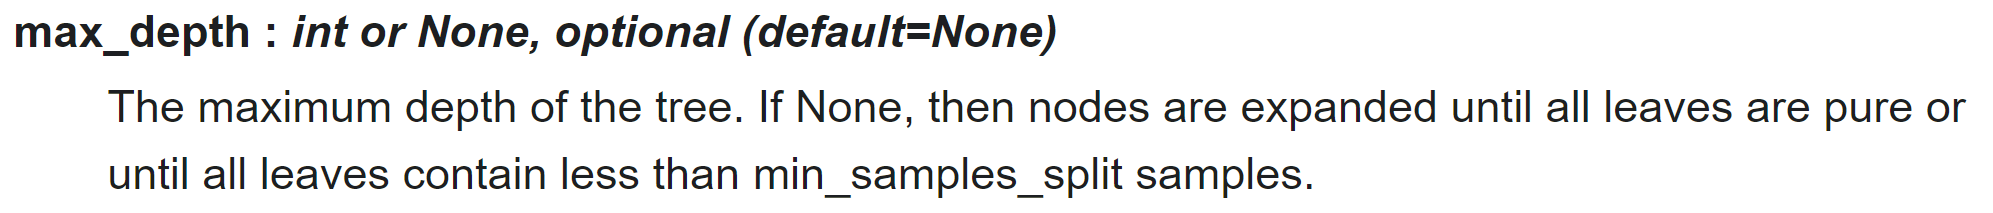

In [7]:
Image(filename='max_depth.PNG')

In [8]:
decision_tree = DecisionTreeClassifier(max_depth = 2)
decision_tree = decision_tree.fit(x_train, y_train)

y_pred_train = decision_tree.predict(x_train)
y_pred_test = decision_tree.predict(x_test)

from sklearn.metrics import accuracy_score
print("train accuracy - " + str(accuracy_score(y_train, y_pred_train)))

print("test accuracy - " + str(accuracy_score(y_test, y_pred_test)))

train accuracy - 0.6748681898066784
test accuracy - 0.6983240223463687


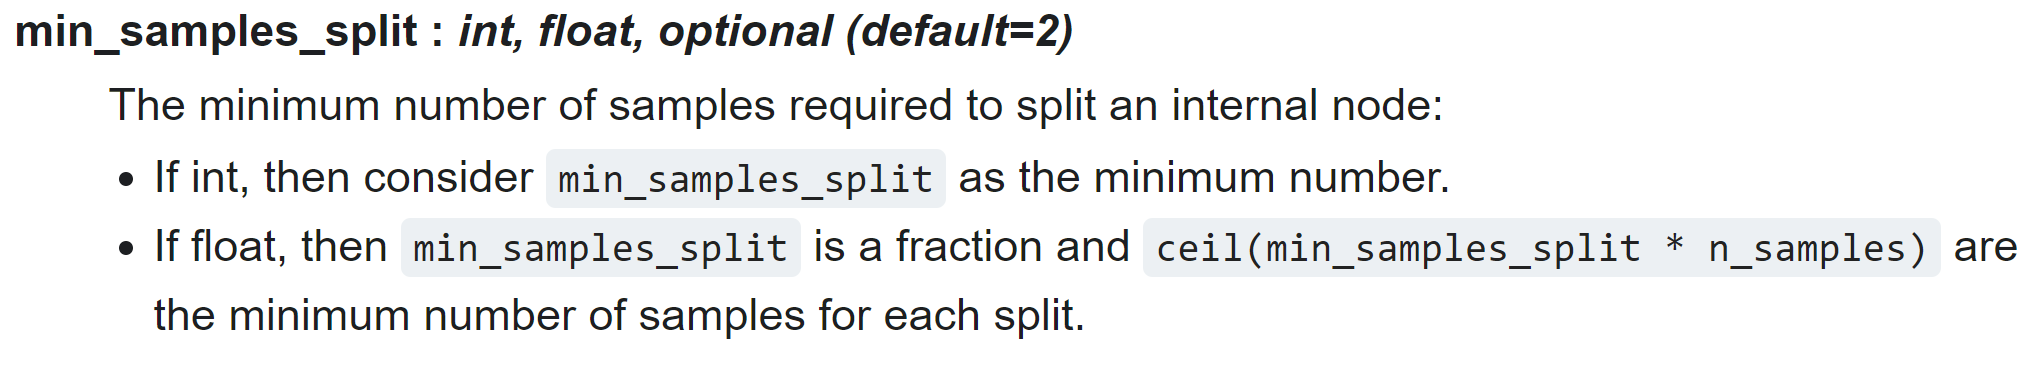

In [9]:
Image(filename='min_samples_split.PNG')

In [10]:
decision_tree = DecisionTreeClassifier(min_samples_split = 0.3)
decision_tree = decision_tree.fit(x_train, y_train)

y_pred_train = decision_tree.predict(x_train)
y_pred_test = decision_tree.predict(x_test)

from sklearn.metrics import accuracy_score
print("train accuracy - " + str(accuracy_score(y_train, y_pred_train)))

print("test accuracy - " + str(accuracy_score(y_test, y_pred_test)))

train accuracy - 0.6748681898066784
test accuracy - 0.6983240223463687


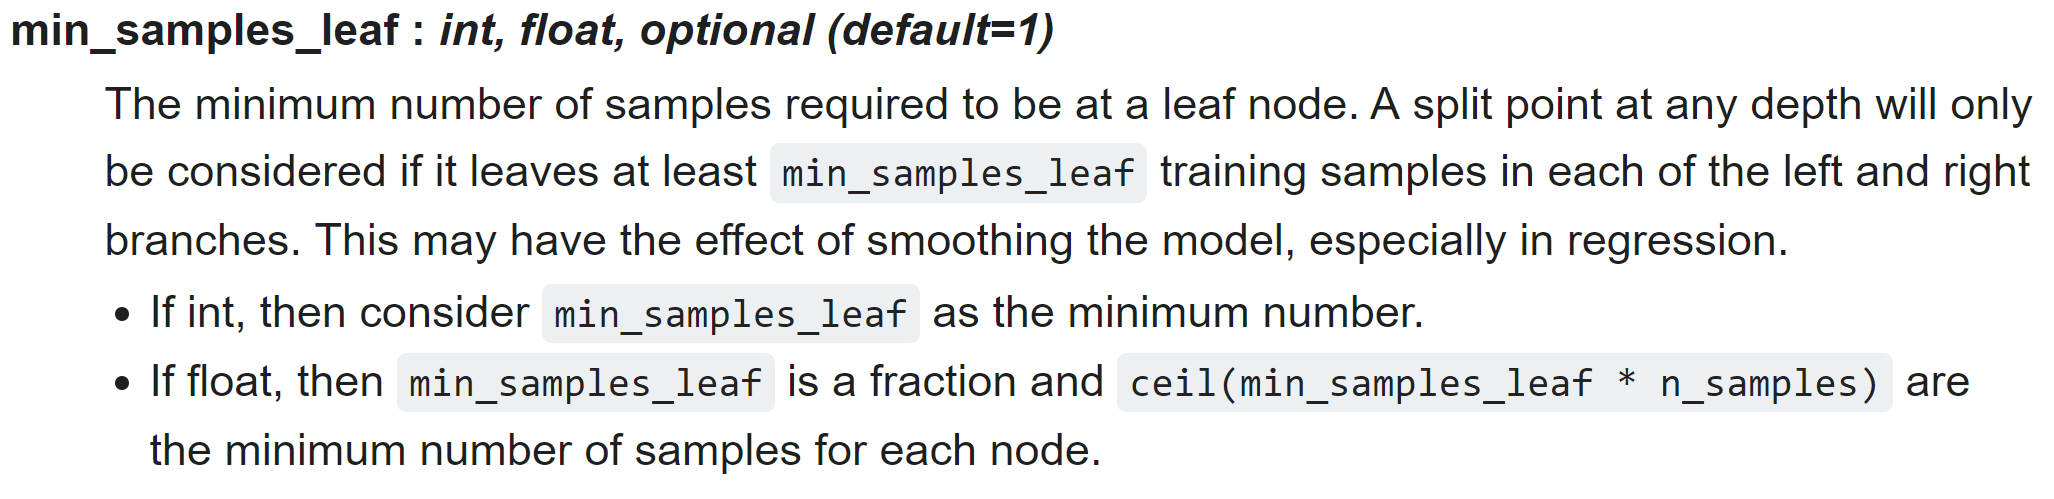

In [11]:
Image(filename='‏‏min_samples_leaf.PNG')

In [12]:
decision_tree = DecisionTreeClassifier(min_samples_leaf = 0.5)
decision_tree = decision_tree.fit(x_train, y_train)

y_pred_train = decision_tree.predict(x_train)
y_pred_test = decision_tree.predict(x_test)

from sklearn.metrics import accuracy_score
print("train accuracy - " + str(accuracy_score(y_train, y_pred_train)))

print("test accuracy - " + str(accuracy_score(y_test, y_pred_test)))

train accuracy - 0.6274165202108963
test accuracy - 0.5865921787709497


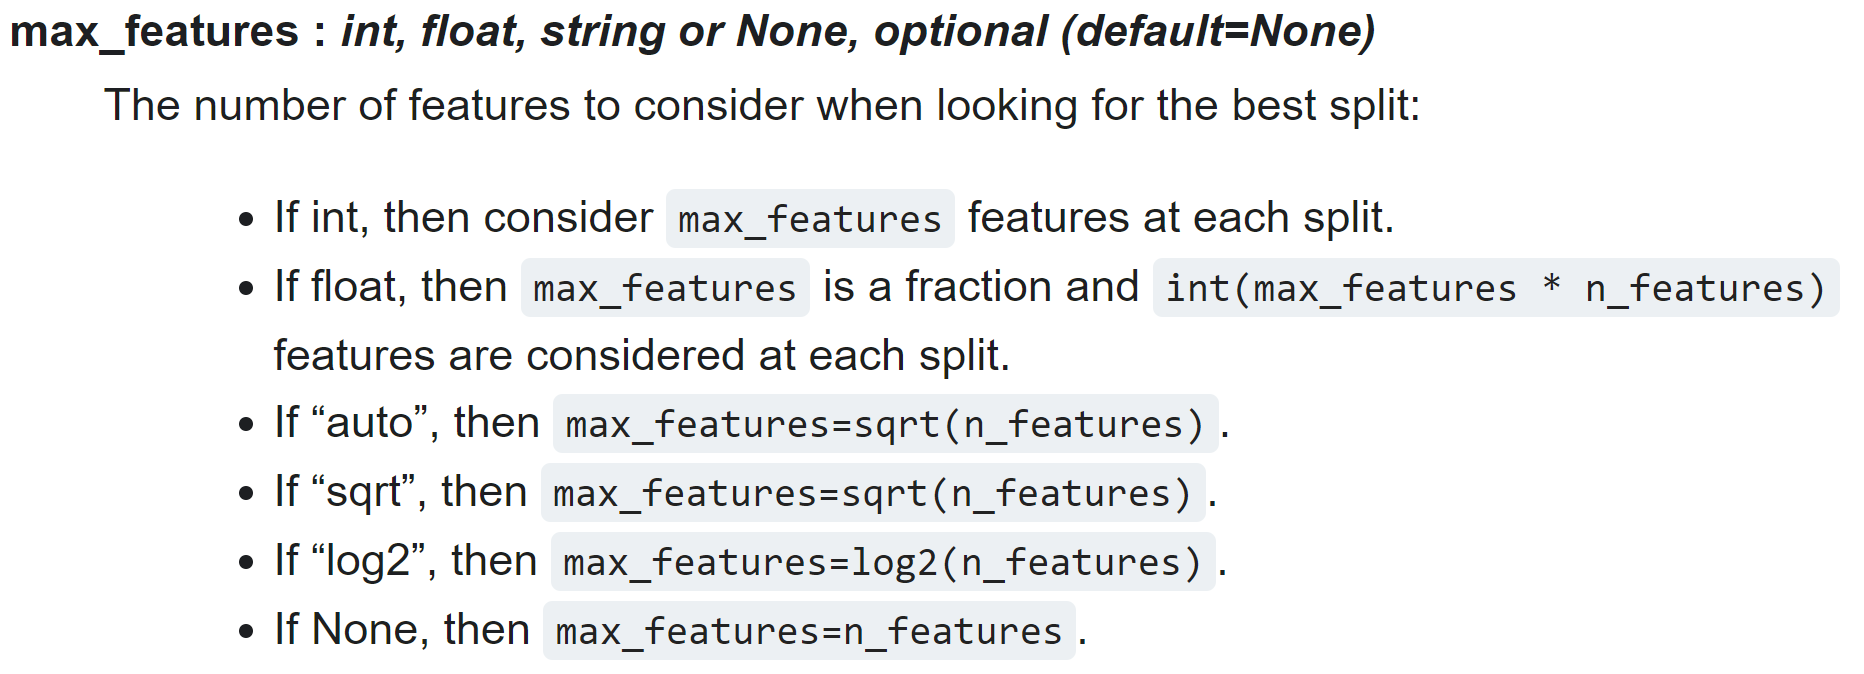

In [13]:
Image(filename='‏‏max_features.PNG')

In [14]:
decision_tree = DecisionTreeClassifier(max_features = 0.5)
decision_tree = decision_tree.fit(x_train, y_train)

y_pred_train = decision_tree.predict(x_train)
y_pred_test = decision_tree.predict(x_test)

from sklearn.metrics import accuracy_score
print("train accuracy - " + str(accuracy_score(y_train, y_pred_train)))

print("test accuracy - " + str(accuracy_score(y_test, y_pred_test)))

train accuracy - 0.8066783831282952
test accuracy - 0.5977653631284916


# Random Forest

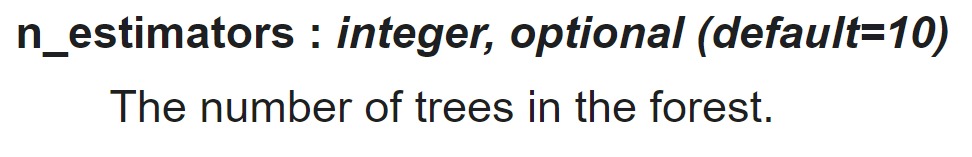

In [15]:
Image(filename='‏‏n_estimators.PNG')

In [16]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest = random_forest.fit(x_train, y_train)

y_pred_train = random_forest.predict(x_train)
y_pred_test = random_forest.predict(x_test)


print("train accuracy - " + str(accuracy_score(y_train, y_pred_train)))

print("test accuracy - " + str(accuracy_score(y_test, y_pred_test)))

train accuracy - 0.8066783831282952
test accuracy - 0.5810055865921788


# K-Fold

In [17]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#
random_forest = RandomForestClassifier(n_estimators=100)

from sklearn.model_selection import cross_validate
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

scores = cross_validate(random_forest, x_train, y_train, cv=5, scoring='accuracy')
print("Test Score")
print(scores['test_score'])

print("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2))


Test Score
[0.65034965 0.63636364 0.65034965 0.66901408 0.60992908]
Accuracy: 0.64 (+/- 0.04)


# Evaluate Model Performance

## Evaluate Model Performance - confusion matrix

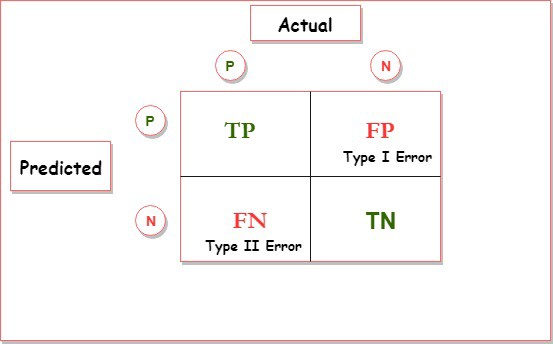

In [18]:
from IPython.display import Image
Image(filename='confusion matrix.jpeg')

## Evaluate Model Performance - recall precision and f1_score

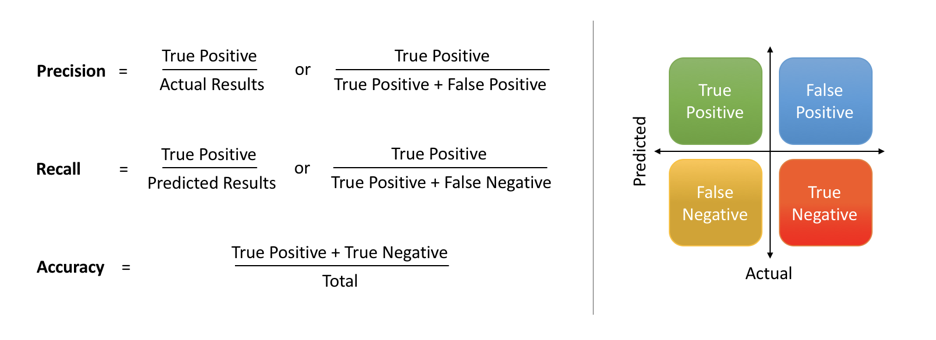

In [19]:
Image(filename='recall_precision_accuracy.png')

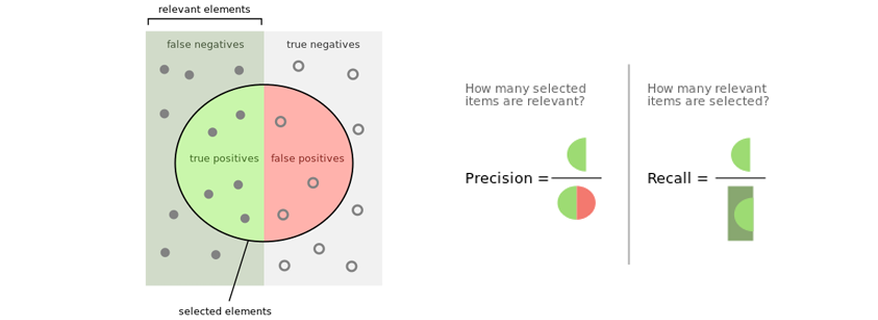

In [20]:
Image(filename='recall_precision.png')

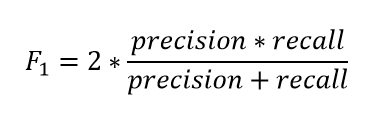

In [21]:
Image(filename='f1_score.png')

## Evaluate Model Performance - ROC , AUC

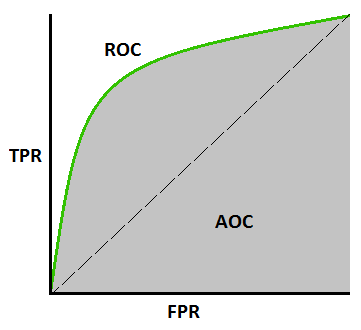

In [22]:
Image(filename='ROC Curve.png')

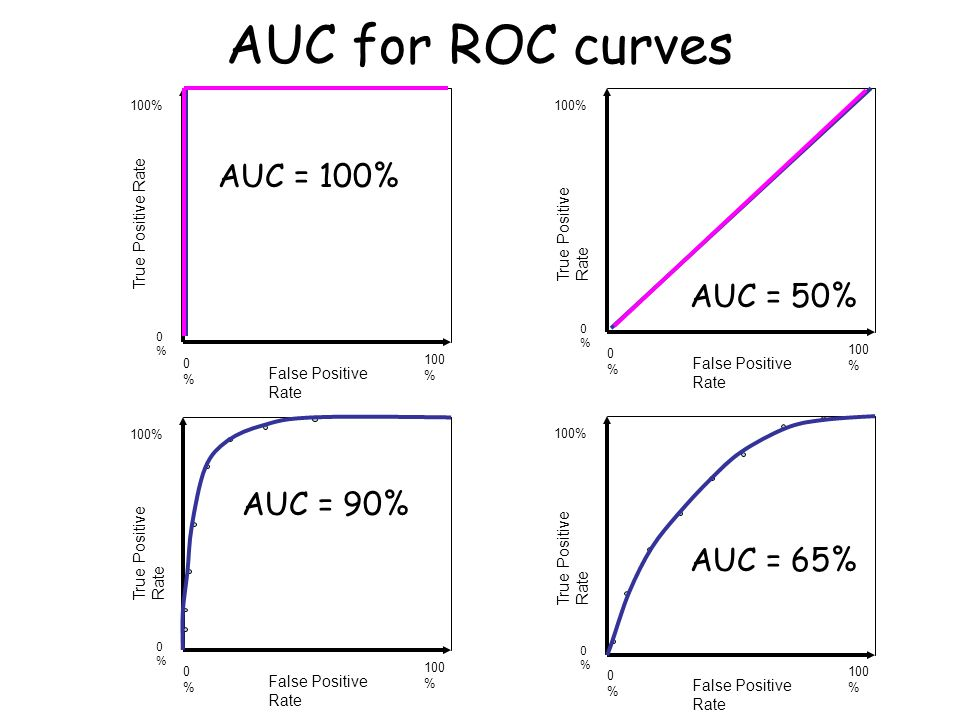

In [23]:
Image(filename='auc.jpg')

## Evaluate Model Performance - Implementation

In [24]:
random_forest = RandomForestClassifier()
random_forest = random_forest.fit(x_train, y_train)

y_pred_train = random_forest.predict(x_train)
y_pred_test = random_forest.predict(x_test)
y_pred_val = random_forest.predict(x_val)



print("train accuracy - " + str(accuracy_score(y_train, y_pred_train)))

print("test accuracy - " + str(accuracy_score(y_test, y_pred_test)))

print("val accuracy - " + str(accuracy_score(y_val, y_pred_val)))

train accuracy - 0.7780898876404494
test accuracy - 0.6145251396648045
val accuracy - 0.6145251396648045


C:\Users\zigi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [25]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, y_pred_val))
tn, fp, fn, tp = confusion_matrix(y_val, y_pred_val).ravel()

[[82 23]
 [46 28]]


In [26]:
from sklearn.metrics import precision_score
precision_score(y_val, y_pred_val)

0.5490196078431373

In [27]:
from sklearn.metrics import recall_score
recall_score(y_val, y_pred_val) 

0.3783783783783784

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred_val)

0.6145251396648045

In [29]:
from sklearn.metrics import f1_score
f1_score(y_val, y_pred_val)  

0.448

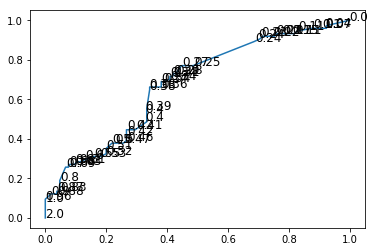

In [30]:
from sklearn import metrics
y_score = random_forest.predict_proba(x_val)

fpr, tpr, thresholds = metrics.roc_curve(y_val, y_score[:,1])
plt.plot(fpr, tpr)
for i in range(len(fpr)):
    plt.text(round(fpr[i],2), round(tpr[i],2), round(thresholds[i],2), fontsize=12)
plt.show()

In [31]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_val, y_score[:,1])
f1_score_ = 2*(precision*recall)/(precision+recall)

index_of_max_f1_score = np.argmax(f1_score_)

thresholds_of_max_f1_score = thresholds[index_of_max_f1_score]
print(thresholds_of_max_f1_score)

0.2654761904761904


In [32]:
mask = y_score[:,1] > thresholds_of_max_f1_score
new_y_pred = y_score
new_y_pred[mask,1] = 1
new_y_pred[~mask,1] = 0

from sklearn.metrics import f1_score
f1_score(y_val, y_pred_val)  

print("f1_score before roc curve - " + str(f1_score(y_val.values, y_pred_val)))

print("f1_score after roc curve - " + str(f1_score(y_val, new_y_pred[:,1])))

f1_score before roc curve - 0.448
f1_score after roc curve - 0.6242774566473988


# feature_importances_

In [33]:
random_forest.feature_importances_

array([0.        , 0.03125481, 0.10273427, 0.03975207, 0.06621336,
       0.7600455 ])

In [34]:
np.sum(random_forest.feature_importances_)

1.0